<a href="https://colab.research.google.com/github/fabiormazza/IA025_2022S1/blob/main/projeto_final/fabio_mazza/projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Get dataset annotations

#Get stuff annotations
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip "/content/annotations_trainval2017.zip"

--2022-06-23 23:55:58--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.231.81
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.231.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip.3’

notations_trainval2  31%[=====>              ]  77.14M  25.5MB/s    eta 6s     ^C
Archive:  /content/annotations_trainval2017.zip
replace annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [44]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [45]:
dataDir='/content'
dataType='instances_train2017'
annFile='{}/annotations/{}.json'.format(dataDir,dataType)

In [46]:
coco_annotation=COCO(annFile)

loading annotations into memory...
Done (t=16.89s)
creating index...
index created!


In [47]:
# Category IDs.
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive.

Number of Unique Categories: 80
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]


In [48]:
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)

Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [49]:
cats

[{'id': 1, 'name': 'person', 'supercategory': 'person'},
 {'id': 2, 'name': 'bicycle', 'supercategory': 'vehicle'},
 {'id': 3, 'name': 'car', 'supercategory': 'vehicle'},
 {'id': 4, 'name': 'motorcycle', 'supercategory': 'vehicle'},
 {'id': 5, 'name': 'airplane', 'supercategory': 'vehicle'},
 {'id': 6, 'name': 'bus', 'supercategory': 'vehicle'},
 {'id': 7, 'name': 'train', 'supercategory': 'vehicle'},
 {'id': 8, 'name': 'truck', 'supercategory': 'vehicle'},
 {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'},
 {'id': 10, 'name': 'traffic light', 'supercategory': 'outdoor'},
 {'id': 11, 'name': 'fire hydrant', 'supercategory': 'outdoor'},
 {'id': 13, 'name': 'stop sign', 'supercategory': 'outdoor'},
 {'id': 14, 'name': 'parking meter', 'supercategory': 'outdoor'},
 {'id': 15, 'name': 'bench', 'supercategory': 'outdoor'},
 {'id': 16, 'name': 'bird', 'supercategory': 'animal'},
 {'id': 17, 'name': 'cat', 'supercategory': 'animal'},
 {'id': 18, 'name': 'dog', 'supercategory': 'animal'},

In [50]:
query_cat_id = 80
img_ids = coco_annotation.getImgIds(catIds=[query_cat_id])
img_info = coco_annotation.loadImgs([img_ids[7]])
img_info

[{'coco_url': 'http://images.cocodataset.org/train2017/000000497160.jpg',
  'date_captured': '2013-11-22 20:16:28',
  'file_name': '000000497160.jpg',
  'flickr_url': 'http://farm4.staticflickr.com/3197/3024094605_c02a38e61e_z.jpg',
  'height': 376,
  'id': 497160,
  'license': 4,
  'width': 500}]

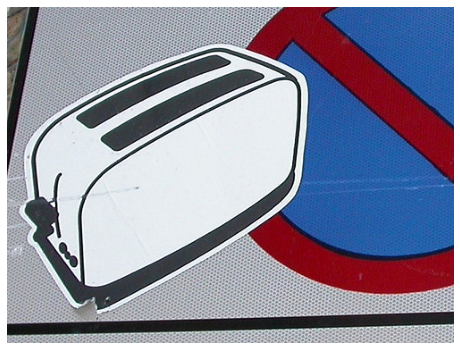

In [51]:
img_url = img_info[0]["coco_url"]
I = io.imread(img_url)
plt.axis('off')
plt.imshow(I)
plt.show()

In [58]:
img_id = img_info[0]["id"]
ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco_annotation.loadAnns(ann_ids)
print(f"Annotations for Image ID {img_id}:")
print(anns)

Annotations for Image ID 497160:
[{'segmentation': [[241.27, 37.95, 324.93, 68.77, 334.61, 78.46, 339.02, 102.23, 331.97, 179.72, 326.69, 201.73, 320.52, 212.3, 303.79, 229.91, 215.74, 286.27, 131.2, 333.82, 101.26, 344.38, 98.62, 332.94, 93.34, 331.18, 78.37, 339.1, 28.18, 267.78, 21.13, 258.09, 28.18, 249.28, 11.45, 230.79, 20.25, 218.46, 14.97, 160.35, 36.98, 134.81, 79.25, 100.47, 175.23, 55.56, 238.63, 37.07]], 'area': 67745.08085, 'iscrowd': 0, 'image_id': 497160, 'bbox': [11.45, 37.07, 327.57, 307.31], 'category_id': 80, 'id': 1128544}]
